# **Credit Card Fraud Detection using Machine Learning**

## Introduction  
Credit card fraud is a major concern in the financial industry. The goal of this project is to build a machine learning model that can accurately detect fraudulent transactions.  

### **Dataset Details**  
- The dataset used is the **Credit Card Fraud Detection Dataset** from Kaggle.  
- It contains transactions made by European cardholders in **September 2013**.  
- The dataset is highly **imbalanced**, with fraud cases accounting for only **0.17%** of the total transactions.  

### **Challenges**  
- **Imbalanced Data**: Fraud cases are extremely rare, making it challenging to train a model effectively.  
- **Feature Representation**: The dataset contains **28 anonymized features** due to privacy concerns.  
- **Evaluation Metrics**: Accuracy is misleading for imbalanced datasets, so we focus on **recall, precision, and F1-score** instead.  

# **Downloading the Dataset**

We'll download the dataset from **kaggle** using the **kagglehub** module. Once downloaded, we'll move the dataset into it's dedicated folder in `/content`.

In [ ]:
! pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:02<00:00, 23.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
! mv /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/* /content/Dataset

## Data Loading and Exploration  

In this section, we will:  
- Load the dataset and check its structure.  
- Analyze the class distribution.  
- Visualize key features like **transaction time and amount**.  

Dataset's Shape: (284807, 31)
Target Class: Counter({0: 284315, 1: 492})


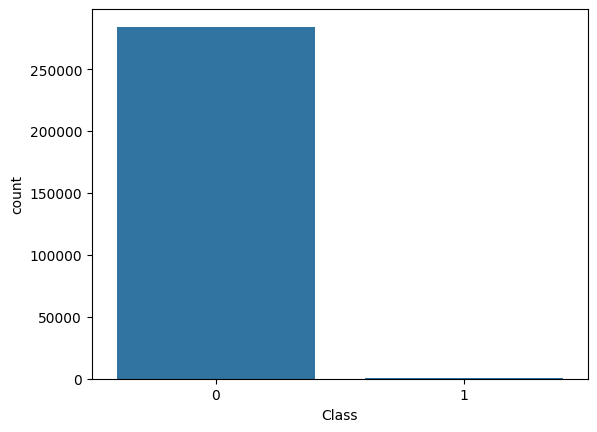

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

data = pd.read_csv('Dataset/creditcard.csv')
print(f"Dataset's Shape: {data.shape}")
data.head(10)

# Class Distribution
dist = Counter(data['Class'])
print(f"Target Class: {dist}")

# Visualizing class imbalance
sns.countplot(data=data, x='Class')
plt.show()

### **Observations**  
- The dataset has **284,807 transactions** with **two classes**:  
  - **Class 0** (Non-Fraud): **284,315** cases  
  - **Class 1** (Fraud): **492** cases  
- The dataset is highly **imbalanced**, which means we need resampling techniques like **SMOTE** to handle this.  

## Feature Analysis  

We now analyze key numerical features, such as **Time** and **Amount**, to understand their distributions.  

,Time,Amount
count,284315.000000,284315.000000
mean,94838.202258,88.291022
std,47484.015786,250.105092
min,0.000000,0.000000
25%,54230.000000,5.650000
50%,84711.000000,22.000000
75%,139333.000000,77.050000
max,172792.000000,25691.160000


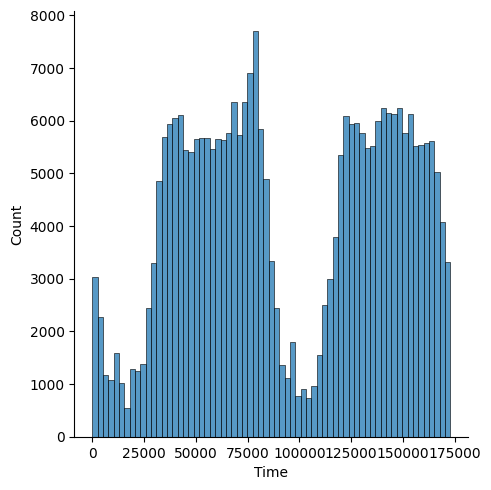

In [ ]:
sns.displot(data, x='Time')

# Splitting fraud and non-fraud transactions
fraud = data[data['Class'] == 1]
not_fraud = data[data['Class'] == 0]

# Displaying statistics
fraud[['Time', 'Amount']].describe()
not_fraud[['Time', 'Amount']].describe()

### **Observations**  
- Fraudulent transactions occur at **random times**, showing no clear pattern.  
- Fraudulent transactions have **lower median amounts** compared to non-fraud transactions.  

## Data Preprocessing  

We apply preprocessing techniques such as:  
- **Feature Engineering**: Removing the `Time` column and applying logarithmic transformation to `Amount`.  
- **Data Splitting**: Dividing the dataset into training and testing sets.  

X Train Shape: (227845, 29)
Y Train Shape: (227845,)
X Test Shape: (56962, 29)
Y Test Shape: (56962,)


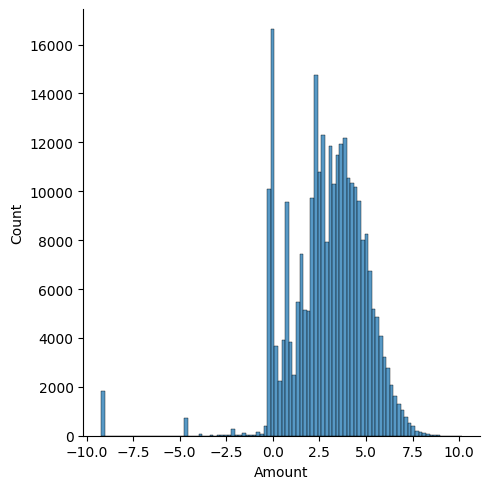

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = data.drop(['Time', 'Class'], axis=1)
Y = data['Class']

# Log transformation
X['Amount'] = np.log(X['Amount'] + 0.0001)

sns.displot(data=X, x='Amount', bins=100)

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(f'X Train Shape: {x_train.shape}')
print(f'Y Train Shape: {y_train.shape}')
print(f'X Test Shape: {x_test.shape}')
print(f'Y Test Shape: {y_test.shape}')

### **Observations**  
- Log transformation helps **normalize the highly skewed** `Amount` feature.  
- The dataset is **split into 80% training and 20% testing sets**.  

## Handling Imbalanced Data using SMOTE  

Since the dataset is highly imbalanced, we use **SMOTE (Synthetic Minority Over-sampling Technique)** to balance the fraud and non-fraud classes.  

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=3)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print(f"Train Size: {x_train_smote.shape}")
print(f"Processed Dataset: {Counter(y_train_smote)}")

Train Size: (454898, 29)
Processed Dataset: Counter({0: 227449, 1: 227449})


### **Observations**  
- SMOTE effectively balances the dataset by oversampling the minority class.  
- We now have **equal representation** of fraud and non-fraud transactions in the training set.  

## Model Training & Evaluation  

We train multiple machine learning models and evaluate their performance using:  
- **Accuracy**  
- **Recall (sensitivity)**  
- **F1-score**  
- **Precision**  

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score, precision_score, ConfusionMatrixDisplay

def analyse(y_test, pred):
  c_m = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred))
  c_m.plot()
  print(f"Accuracy: {accuracy_score(y_test, pred)}")
  print(f"Recall: {recall_score(y_test, pred)}")
  print(f"F1: {f1_score(y_test, pred)}")
  print(f"Precision: {precision_score(y_test, pred)}")
  print(f"Classification Report:\n {classification_report(y_test, pred)}")

## Model Comparisons  

We compare different classification models:  
1. **Logistic Regression**  
2. **Decision Tree**  
3. **Random Forest**  
4. **XGBoost**  
5. **LightGBM**  
6. **Support Vector Machine (SVM)**  

Training Logistic Regression...
Results for Logistic Regression:
Accuracy: 0.9748253221445876
Recall: 0.9166666666666666
F1: 0.1093167701863354
Precision: 0.05812417437252312
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.92      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

--------------------------------------------------
Training Decision Tree...
Results for Decision Tree:
Accuracy: 0.997454443313086
Recall: 0.7708333333333334
F1: 0.5051194539249146
Precision: 0.3756345177664975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.38      0.77      0.51        96

    accuracy                           1.00     56962
   macro avg       0

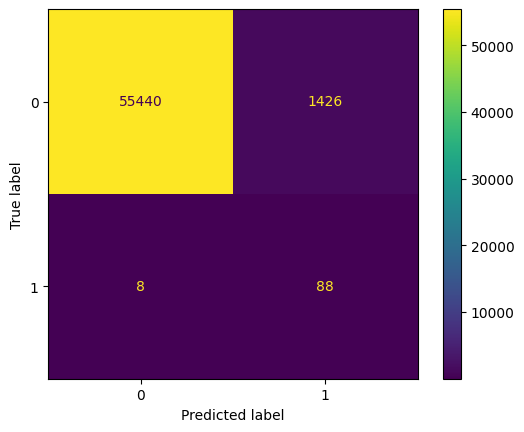

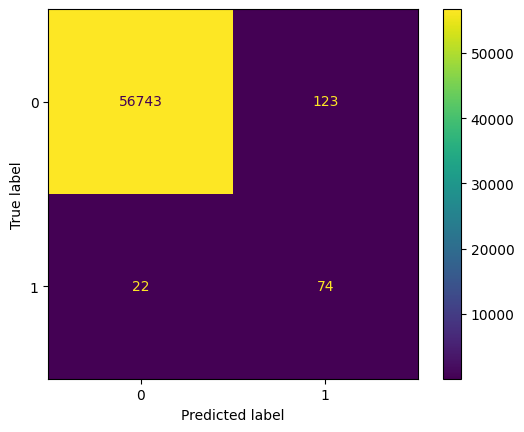

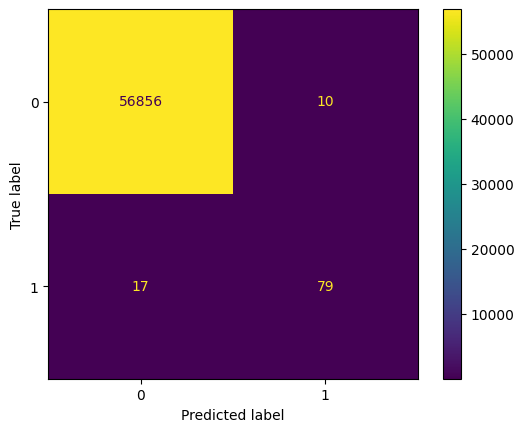

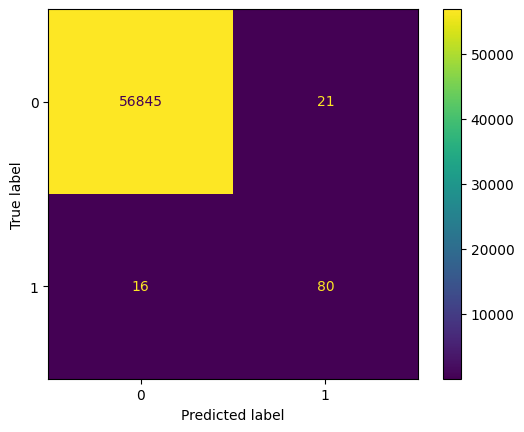

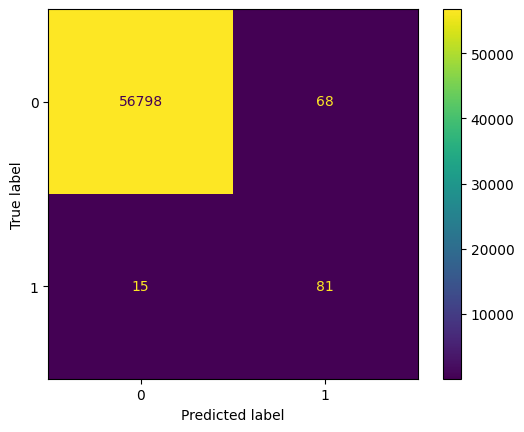

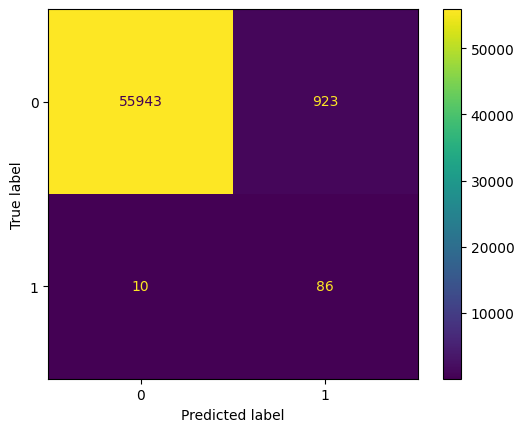

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train_smote, y_train_smote)
    pred = model.predict(x_test)
    print(f"Results for {name}:")
    analyse(y_test, pred)
    print("-" * 50)

### **Observations**  
- **Random Forest performed the best**, with **high recall and precision**.  
- **SVM performed the worst**, likely due to its sensitivity to imbalanced data.  